In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [113]:
np.random.seed(0)

X, y = datasets.make_circles(n_samples=1000, factor=.3, noise=0.15)

Text(0, 0.5, '$x_2$')

<Figure size 432x288 with 0 Axes>

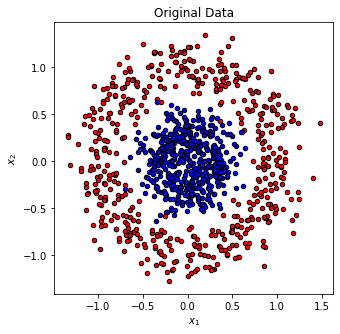

In [114]:
plt.figure()
plt.subplots(1,1,figsize=(5,5))
# plt.subplot(1,2,3, projection='polar')
plt.title("Original Data")
reds = y == 0
blues = y == 1

plt.scatter(X[reds, 0], X[reds, 1], c="red",
            s=20, edgecolor='k')
plt.scatter(X[blues, 0], X[blues, 1], c="blue",
            s=20, edgecolor='k')
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

In [115]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

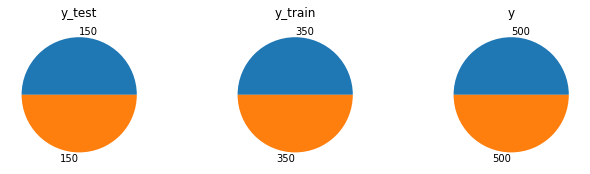

In [116]:
k = np.bincount(y)
m = np.bincount(y_test)
n = np.bincount(y_train)
fig = plt.figure()
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
ax1.pie(m,labels=m)
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
ax2.pie(n,labels=n)
ax3 = fig.add_axes([1, .0, .5, .5], aspect=1)
ax3.pie(k,labels=k)

ax1.set_title('y_test')
ax2.set_title('y_train')
ax3.set_title('y')
plt.show()
pass

In [117]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_scale = sc.transform(X_train)
X_test_scale= sc.transform(X_test)

In [118]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_scale, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [119]:
y_pred = ppn.predict(X_test_scale)
print('Misclassified examples: %d' % (y_test != y_pred).sum())

Misclassified examples: 114


In [120]:
from sklearn.metrics import accuracy_score

print('Prediction Accuracy: %.3f' % accuracy_score(y_test, y_pred))

Prediction Accuracy: 0.620


In [121]:
print('Training Accuracy: %.3f' % ppn.score(X_train_scale, y_train))

Training Accuracy: 0.611


In [122]:
print('Test Accuracy: %.3f' % ppn.score(X_test_scale, y_test))

Test Accuracy: 0.620


In [124]:
from mlxtend.plotting import plot_decision_regions


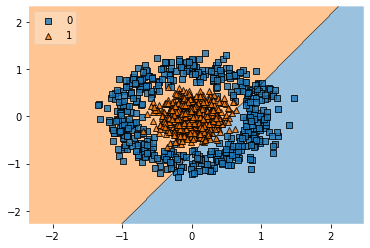

In [125]:
plot_decision_regions(X, y, clf=ppn, legend=2)

## SVM RBF kernal

In [126]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf',C=1 , gamma=100)
svm.fit(X_train_scale, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=100, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [127]:
svc_y_pred = svm.predict(X_test_scale)
print('False Negative: %d' % (y_test != svc_y_pred).sum())

False Negative: 12


In [128]:
print('Prediction Accuracy SVC: %.3f' % accuracy_score(y_test, svc_y_pred))

Prediction Accuracy SVC: 0.960


In [129]:
print('Training Accuracy: %.3f' % svm.score(X_train_scale, y_train))

Training Accuracy: 0.997


In [130]:
print('Test Accuracy: %.3f' % svm.score(X_test_scale, y_test))

Test Accuracy: 0.960


In [131]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, svc_y_pred)
print(cm)

[[150   0]
 [ 12 138]]


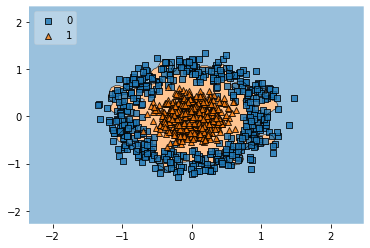

In [132]:
plot_decision_regions(X, y, clf=svm, legend=2)

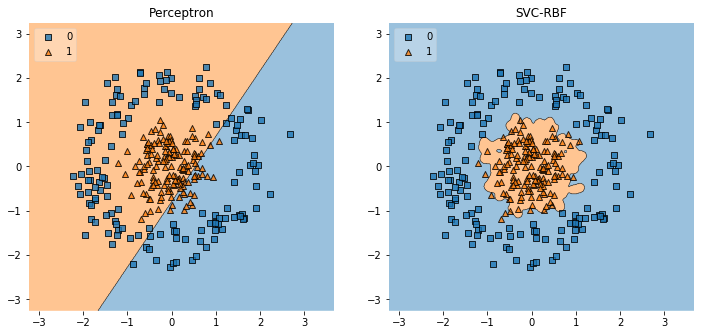

In [133]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
plot_decision_regions(X_test_scale, y_test, clf=ppn, legend=2)
ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
plot_decision_regions(X_test_scale, y_test, clf=svm, legend=2)


ax1.set_title('Perceptron')
ax2.set_title('SVC-RBF')

plt.show()
pass

## Multi-layer Perceptron

In [134]:
from sklearn.neural_network import MLPClassifier

clf_mlp = MLPClassifier(solver='lbfgs', alpha=1e-5,
                   hidden_layer_sizes=(5, 2), random_state=1)

clf_mlp.fit(X_train_scale, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(5, 2), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='lbfgs',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [135]:
mlf_y_pred = clf_mlp.predict(X_test_scale)
print('False Negative: %d' % (y_test != mlf_y_pred).sum())

False Negative: 2


In [136]:
print('Prediction Accuracy SVC: %.3f' % accuracy_score(y_test, mlf_y_pred))

Prediction Accuracy SVC: 0.993


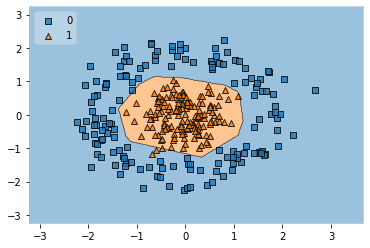

In [137]:
plot_decision_regions(X_test_scale, y_test, clf=clf_mlp, legend=2)

In [138]:
[coef.shape for coef in clf_mlp.coefs_]

[(2, 5), (5, 2), (2, 1)]

In [ ]:
clf_mlp.predict_proba(X_test_scale)

## Multiple Models

In [139]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
import matplotlib.gridspec as gridspec
import itertools

In [140]:
clf_pct = Perceptron()
clf_rfc = RandomForestClassifier(random_state=1, n_estimators=100)
clf_nb = GaussianNB()
clf_svc = SVC(gamma=100)

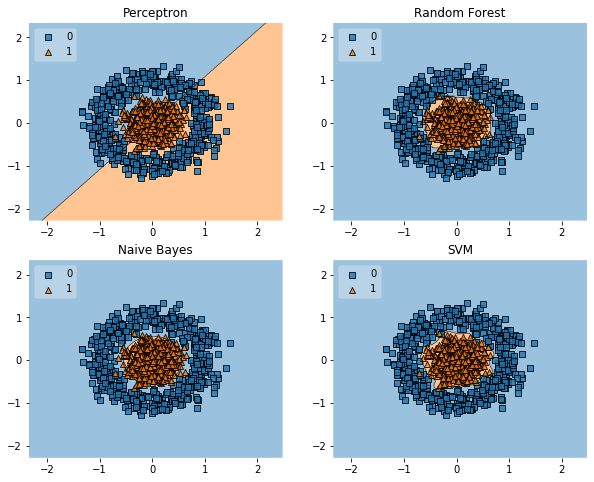

In [146]:
gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10,8))

labels = ['Perceptron', 'Random Forest', 'Naive Bayes', 'SVM']
for clf, lab, grd in zip([clf_lr, clf_rfc, clf_nb, clf_svc],
                         labels,
                         itertools.product([0, 1], repeat=2)):

    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    plt.title(lab)
   

plt.show()